You are provided with user activity data on google services. Your goal is to predict the logarithm of Total Revenue. Full data description could be found here https://www.kaggle.com/competitions/ga-customer-revenue-prediction/data. For this assignment we performed some data preparation and cleaning, and selected about 20% of the training observations. If you are interested in the specifics you could find a jupyter notebook with comments here https://github.com/kurmukovai/ds-for-business-2022/blob/main/home-assignment-2/ha2_data_prep.ipynb. You are provided with two tables ha2_train.csv and ha2_test.csv. You will only need ha2_test.csv for question 11.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### 1. Read data description, you could read about features here https://support.google.com/analytics/answer/3437719?hl=en. Columns weekday, day, month and year were extracted from column "date". Column visitHour was extracted from column "visitStartTime". How many observations are in your training dataset? How many features? (two integer numbers divided by a comma, e.g. 1000, 10)


In [3]:
df = pd.read_csv("ha2_train.csv")

In [13]:
df.shape

(251396, 28)

### 2. Encode rare categories (less than 1000 occurrences) in categorical features with the value “Other”. How many columns requires such imputation? (single integer number)

In [4]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
count_ = 0
for column in categorical_columns:
    a = df[column].value_counts()<1000
    arr_for_replace = list(a[a].index)
    for i in arr_for_replace:
        df[column] = np.where((df[column] == i), 'Other', df[column])
    if len(arr_for_replace)!=0:
        count_+=1
    print(column, arr_for_replace)

channelGrouping ['(Other)']
device.browser ['UC Browser', 'YaBrowser', 'Amazon Silk', 'Coc Coc', 'Android Browser', 'Mozilla Compatible Agent', 'Maxthon', 'MRCHROME', 'BlackBerry', 'Puffin', 'Nintendo Browser', 'Nokia Browser', 'osee2unifiedRelease', 'Apple-iPhone7C2', 'LYF_LS_4002_12', '(not set)', 'SeaMonkey', 'Iron', 'Mozilla', 'Seznam', 'SAMSUNG-SM-B355E Opera', '+Simple Browser', ';__CT_JOB_ID__:76fd1acb-e365-43c0-b967-908bcf5d5b59;', '0', 'Nichrome', 'YE', 'flwadqukonrjegpbisyxztvhcm', ';__CT_JOB_ID__:65da7e5f-0f05-4b5d-8d31-1f4d470a2b82;', 'vjebamzrktwcysxpdlonhiufqg', 'DoCoMo', 'DASH_JR_3G', ';__CT_JOB_ID__:a4f837b8-8d78-4c42-ba9a-d870cf1a4a7e;', 'Autn-WKOOP', ';__CT_JOB_ID__:7e575295-571e-4e82-9254-7f2c8bbb9183;', 'Konqueror', 'Playstation Vita Browser', 'Browser', 'Lunascape']
device.operatingSystem ['Windows Phone', 'Samsung', 'Tizen', 'BlackBerry', 'OS/2', 'Xbox', 'Firefox OS', 'Nintendo Wii', 'Nintendo WiiU', 'FreeBSD', 'Playstation Vita', 'OpenBSD', 'NTT DoCoMo', 'SunOS']

In [5]:
count_

10

### 3. What is the median value of totals.totalTransactionRevenue?

### **0.0**

### 0.21

### 1.76

### 1763530.76

In [47]:
df['totals.totalTransactionRevenue'].median()

0.0

### 4.  Build a histogram of successful (non-zero) transactions, what is their median value in dollars?

### 152.66

### 24.99

### 17.80

### **53.97**

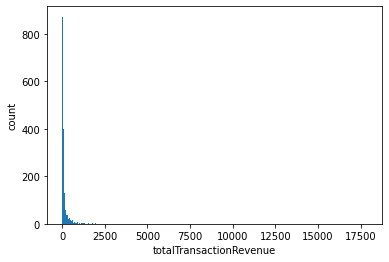

In [85]:
arr_transactions = list(df[df['totals.totalTransactionRevenue']>0]['totals.totalTransactionRevenue']/10**6)

plt.hist(arr_transactions, bins=int(len(arr_transactions)/5))
plt.xlabel('totalTransactionRevenue')
plt.ylabel('count')

plt.show()

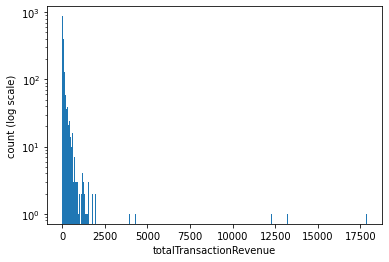

In [86]:
plt.hist(arr_transactions, bins=int(len(arr_transactions)/5))
plt.yscale('log')
plt.xlabel('totalTransactionRevenue')
plt.ylabel('count (log scale)')
plt.show()

In [88]:
np.median(arr_transactions)

53.974999999999994

### 5.  Analyze totals.totalTransactionRevenue with respect to categorical features. For channelGrouping what is its most frequent value?

### Direct
 
### Social

### **Organic Search**

### Referral

In [131]:
for column in categorical_columns:
    print(df.groupby(column)['totals.totalTransactionRevenue'].sum().sort_values()/10**6)
    print('\n\n')

channelGrouping
Other                  0.00
Affiliates           213.19
Social              3188.26
Paid Search        13054.09
Display            17966.92
Organic Search    101359.41
Direct            136487.70
Referral          169839.04
Name: totals.totalTransactionRevenue, dtype: float64



device.browser
Android Webview           0.00
Opera Mini                0.00
Other                     0.00
Samsung Internet          0.00
Safari (in-app)          16.98
Opera                    31.29
Internet Explorer      1349.65
Edge                   2025.30
Safari                14974.69
Firefox               55980.66
Chrome               367730.04
Name: totals.totalTransactionRevenue, dtype: float64



device.operatingSystem
(not set)         0.00
Other             0.00
iOS            6989.16
Linux          9830.29
Android       14855.98
Chrome OS     52616.47
Windows      121376.18
Macintosh    236440.53
Name: totals.totalTransactionRevenue, dtype: float64



device.deviceCategory
tablet 

In [99]:
df['channelGrouping'].mode()

0    Organic Search
dtype: object

### 6. What is channelGrouping with the highest sum of totals.totalTransactionRevenue

### Organic Search

### Direct

### **Referral**

### Paid Search

In [133]:
df.groupby('channelGrouping')['totals.totalTransactionRevenue'].sum().sort_values(ascending=False)/10**6

channelGrouping
Referral          169839.04
Direct            136487.70
Organic Search    101359.41
Display            17966.92
Paid Search        13054.09
Social              3188.26
Affiliates           213.19
Other                  0.00
Name: totals.totalTransactionRevenue, dtype: float64

### 7. What is the month with the highest mean of totals.totalTransactionRevenue?

### December

### May

### October

### **June**

In [138]:
df.groupby('month')['totals.totalTransactionRevenue'].mean().sort_values(ascending=False)/10**6

month
6     3.024198
8     2.673355
2     2.259118
5     2.163146
9     2.056668
4     1.701545
12    1.685706
7     1.624228
1     1.623036
3     1.536391
11    1.101695
10    1.028611
Name: totals.totalTransactionRevenue, dtype: float64

### 8. For which device.browser the largest mean totals.totalTransactionRevenue is achieved?

### **Firefox**

### Internet Explorer

### Safari

### Chrome

In [144]:
df.groupby('device.browser')['totals.totalTransactionRevenue'].mean().sort_values(ascending=False)/10**6

device.browser
Firefox              6.132851
Chrome               2.111971
Edge                 0.671296
Safari               0.330465
Internet Explorer    0.265209
Opera                0.022592
Safari (in-app)      0.008473
Android Webview      0.000000
Opera Mini           0.000000
Other                0.000000
Samsung Internet     0.000000
Name: totals.totalTransactionRevenue, dtype: float64

### 9. Build a line chart of sums of totals.totalTransactionRevenue depending on visitHour. What is the peak sales hour? (integer number from 0 to 23). Hint: use groupby.

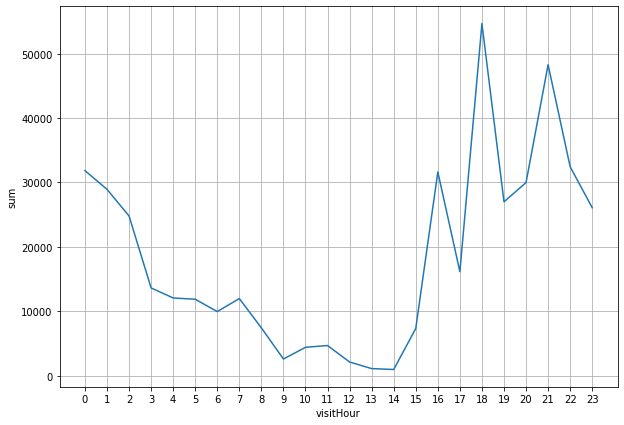

In [158]:
fig = plt.figure(figsize=(10,7))
(df.groupby('visitHour')['totals.totalTransactionRevenue'].sum()/10**6).plot.line()
plt.xticks(list(df.groupby('visitHour')['totals.totalTransactionRevenue'].count().index))
plt.ylabel('sum')
plt.grid()
plt.show()

### Prepare totals.totalTransactionRevenue for model training. Create a new column log_totals.totalTransactionRevenue = log(1+totals.totalTransactionRevenue). Drop column totals.totalTransactionRevenue.

In [6]:
df['log_totals.totalTransactionRevenue'] = np.log1p(df['totals.totalTransactionRevenue'])

In [7]:
df = df.drop('totals.totalTransactionRevenue', axis=1)

### 10. What is the mean value of the log_totals.totalTransactionRevenue column? (float number with 3 significant digits, e.g. 12.345) Hint, both numpy and Orange have log1p function.

In [8]:
np.round(df['log_totals.totalTransactionRevenue'].mean(),3)

0.207

### 11. Train a Catboost regression model to predict log_totals.totalTransactionRevenue. What is your test score in terms of MAE? (float number with 3 significant digits, e.g. 12.345) Do not forget to apply all necessary preprocessing to a test part of the data.

In [9]:
df_test = pd.read_csv("ha2_test.csv")

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118506 entries, 0 to 118505
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   channelGrouping                           118506 non-null  object 
 1   visitNumber                               118506 non-null  int64  
 2   device.browser                            118506 non-null  object 
 3   device.operatingSystem                    118506 non-null  object 
 4   device.isMobile                           118506 non-null  int64  
 5   device.deviceCategory                     118506 non-null  object 
 6   geoNetwork.continent                      118506 non-null  object 
 7   geoNetwork.subContinent                   118506 non-null  object 
 8   geoNetwork.country                        118506 non-null  object 
 9   geoNetwork.city                           118506 non-null  object 
 10  totals.hits         

In [11]:
df_test['log_totals.totalTransactionRevenue'] = np.log1p(df_test['totals.totalTransactionRevenue'])
df_test = df_test.drop('totals.totalTransactionRevenue', axis=1)

In [12]:
pip install catboost -q

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [13]:
from catboost import CatBoostRegressor, Pool

In [240]:
train_dataset = Pool(data=df.drop('log_totals.totalTransactionRevenue', axis=1),
                     label=df['log_totals.totalTransactionRevenue'],
                     cat_features=categorical_columns)

model = CatBoostRegressor(loss_function='MAE')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'iterations': [50,100,500]}

grid_search_result = model.grid_search(grid, 
                                       train_dataset)

Выходные данные были обрезаны до нескольких последних строк (5000).
186:	learn: 0.2081989	test: 0.2016832	best: 0.2014954 (120)	total: 58.9s	remaining: 1m 38s
187:	learn: 0.2081989	test: 0.2016832	best: 0.2014954 (120)	total: 59.3s	remaining: 1m 38s
188:	learn: 0.2081989	test: 0.2016832	best: 0.2014954 (120)	total: 59.5s	remaining: 1m 37s
189:	learn: 0.2081989	test: 0.2016832	best: 0.2014954 (120)	total: 59.8s	remaining: 1m 37s
190:	learn: 0.2081887	test: 0.2017320	best: 0.2014954 (120)	total: 1m	remaining: 1m 37s
191:	learn: 0.2081886	test: 0.2017320	best: 0.2014954 (120)	total: 1m	remaining: 1m 36s
192:	learn: 0.2081886	test: 0.2017320	best: 0.2014954 (120)	total: 1m	remaining: 1m 36s
193:	learn: 0.2081886	test: 0.2017320	best: 0.2014954 (120)	total: 1m	remaining: 1m 35s
194:	learn: 0.2081886	test: 0.2017320	best: 0.2014954 (120)	total: 1m 1s	remaining: 1m 35s
195:	learn: 0.2081886	test: 0.2017320	best: 0.2014954 (120)	total: 1m 1s	remaining: 1m 35s
196:	learn: 0.2081886	test: 0.2017

In [243]:
grid_search_result

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [79]:
train_dataset = Pool(data=df.drop('log_totals.totalTransactionRevenue', axis=1),
                     label=df['log_totals.totalTransactionRevenue'],
                     cat_features=categorical_columns)
test_dataset = Pool(data=df_test.drop('log_totals.totalTransactionRevenue', axis=1),
                    label=df_test['log_totals.totalTransactionRevenue'],
                    cat_features=categorical_columns)

model = CatBoostRegressor(iterations=500,loss_function='MAE',depth=10, learning_rate=0.03)

model.fit(train_dataset)

predictions = model.predict(test_dataset)

0:	learn: 0.2068096	total: 1.8s	remaining: 14m 58s
1:	learn: 0.2067129	total: 3.59s	remaining: 14m 54s
2:	learn: 0.2066709	total: 5.3s	remaining: 14m 37s
3:	learn: 0.2066465	total: 7s	remaining: 14m 27s
4:	learn: 0.2066465	total: 8.78s	remaining: 14m 29s
5:	learn: 0.2066465	total: 10.5s	remaining: 14m 27s
6:	learn: 0.2066465	total: 11.9s	remaining: 14m
7:	learn: 0.2066296	total: 13.6s	remaining: 13m 54s
8:	learn: 0.2066296	total: 15.2s	remaining: 13m 48s
9:	learn: 0.2066296	total: 16.6s	remaining: 13m 34s
10:	learn: 0.2065659	total: 18.4s	remaining: 13m 37s
11:	learn: 0.2065514	total: 20.2s	remaining: 13m 39s
12:	learn: 0.2065196	total: 21.8s	remaining: 13m 36s
13:	learn: 0.2065196	total: 23.4s	remaining: 13m 31s
14:	learn: 0.2065196	total: 24.8s	remaining: 13m 22s
15:	learn: 0.2065174	total: 26.4s	remaining: 13m 19s
16:	learn: 0.2065174	total: 28s	remaining: 13m 16s
17:	learn: 0.2065174	total: 29.6s	remaining: 13m 11s
18:	learn: 0.2065174	total: 31.2s	remaining: 13m 10s
19:	learn: 0.2

In [80]:
 model.get_best_score()

{'learn': {'MAE': 0.17033665733178568}}

In [85]:
from sklearn.metrics import mean_absolute_error

In [84]:
np.round(mean_absolute_error(df_test['log_totals.totalTransactionRevenue'], predictions),3)

0.215

### 12. Check feature importances of a Catboost model, what are the top4 most important features? (comma separated list, e.g. A,B,C,D)

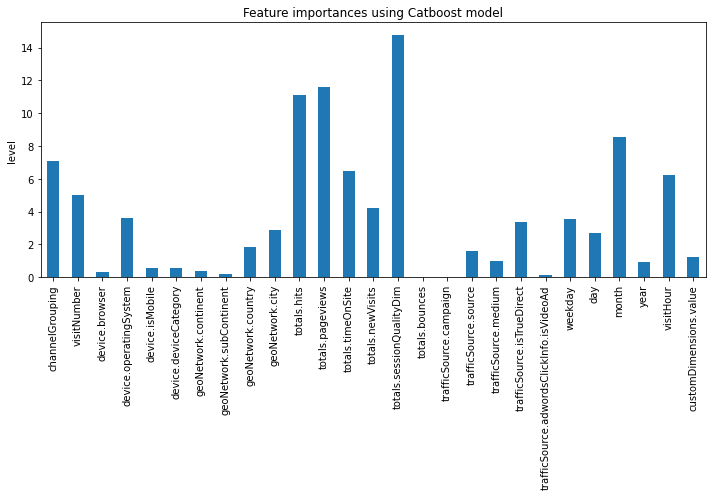

In [82]:
importances=model.feature_importances_
feature_names=list(df_test.columns)[:-1]
model_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(10,7))
model_importances.plot.bar()
ax.set_title("Feature importances using Catboost model")
ax.set_ylabel("level")
fig.tight_layout()

In [83]:
d = dict(zip(feature_names, importances))
print('top4 most important features:\n')
i=0
for k in sorted(d, key=d.get, reverse=True)[:4]:
    print(i+1, k, d[k])
    i+=1

top4 most important features:

1 totals.sessionQualityDim 14.800682371781841
2 totals.pageviews 11.591450032622635
3 totals.hits 11.123360966873346
4 month 8.540808351938372


Analyze the result, how does this error (MAE) translates to real money (use exp1m and transform the result to dollars)? Compare your test result with results on kaggle leaderboard, which one is better? Can you add something to data preparation? Is there any simple way to improve model predictions (without retraining the model)? Upload a report describing your solution (PDF file, up to 3 pages font size 14, no more than 3 figures). Do not include code into your report.